# **Data Mining - Class Assignment W13 Association Rules Mining: Apriori Algorithm**

### M. Ilham Fadhilah Wirayudha - 0706022310062

<br>

## Loading Library

In [23]:
!pip install mlxtend==0.23.1

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [25]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv', encoding='ISO-8859-1')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [26]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [27]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

clean dataset that contains 5 columns and 20507 entries of datas

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\2702905840.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


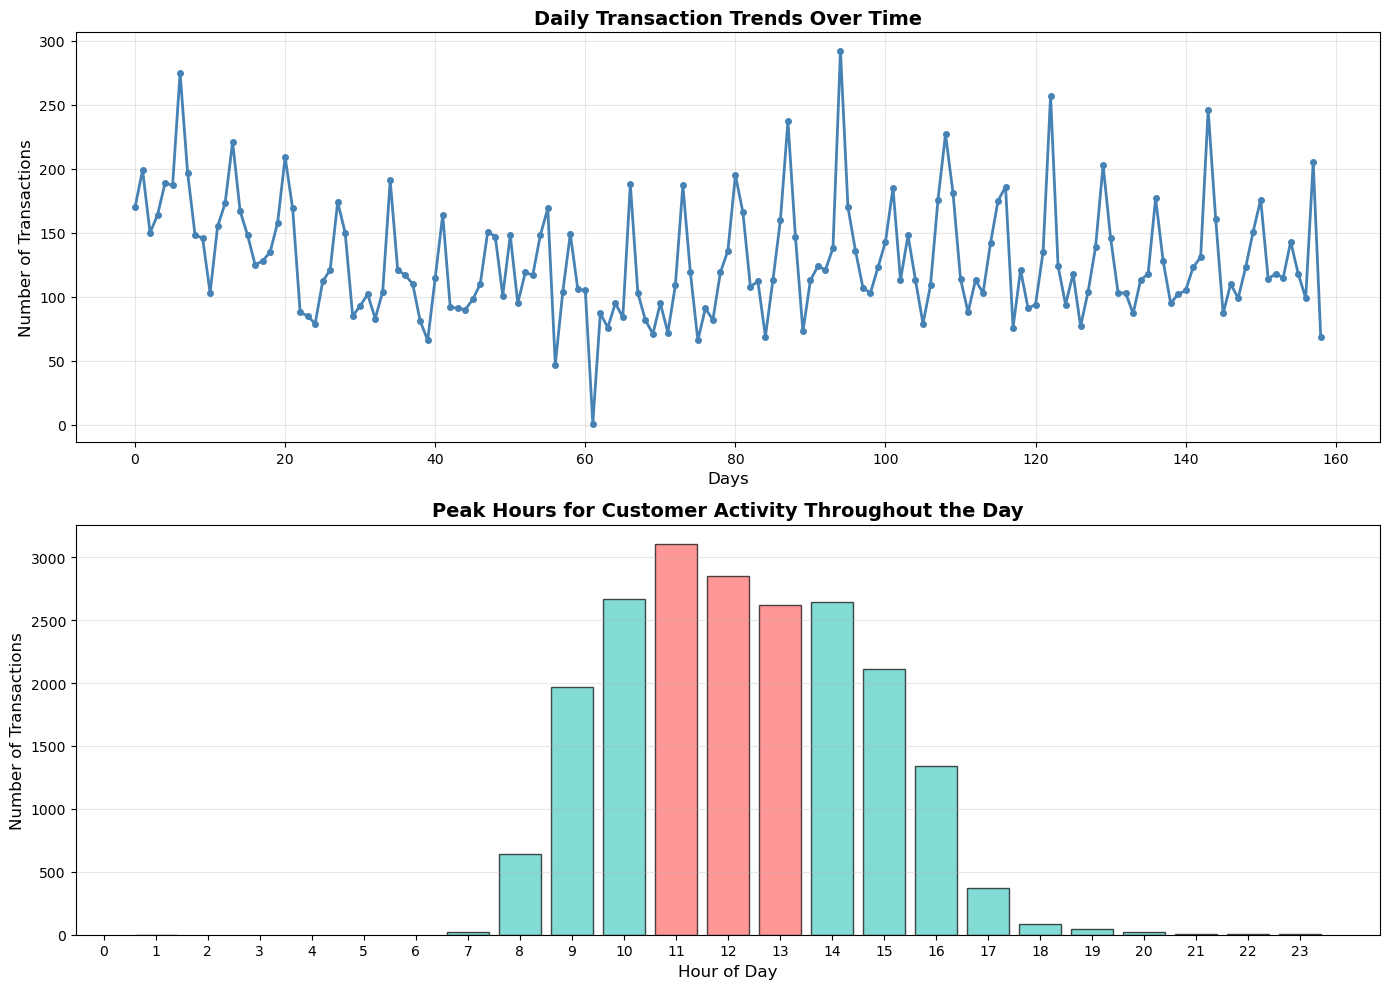

Total days in dataset: 159
Average transactions per day: 128.97

Peak hour: 11:00 with 3102 transactions
Slowest hour: 1:00 with 1 transactions

Top 5 peak hours:
Hour
11    3102
12    2854
10    2666
14    2640
13    2617
dtype: int64


In [28]:
# 5
# Extract date and hour information to analyze transaction trends
df['date_time'] = pd.to_datetime(df['date_time'])
df['Date'] = df['date_time'].dt.date
df['Hour'] = df['date_time'].dt.hour
df['DayName'] = df['date_time'].dt.day_name()

# Analyze daily transaction trends
daily_transactions = df.groupby('Date').size()

# Create a figure with two subplots: daily trends and hourly distribution
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Daily transaction trends
axes[0].plot(range(len(daily_transactions)), daily_transactions.values, linewidth=2, marker='o', markersize=4, color='steelblue')
axes[0].set_xlabel('Days', fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].set_title('Daily Transaction Trends Over Time', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Hourly distribution of transactions (Peak times for customer activity)
hourly_transactions = df.groupby('Hour').size()
colors = ['#FF6B6B' if h in [11, 12, 13] else '#4ECDC4' for h in hourly_transactions.index]
axes[1].bar(hourly_transactions.index, hourly_transactions.values, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Number of Transactions', fontsize=12)
axes[1].set_title('Peak Hours for Customer Activity Throughout the Day', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(0, 24, 1))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total days in dataset: {len(daily_transactions)}")
print(f"Average transactions per day: {daily_transactions.mean():.2f}")
print(f"\nPeak hour: {hourly_transactions.idxmax()}:00 with {hourly_transactions.max()} transactions")
print(f"Slowest hour: {hourly_transactions.idxmin()}:00 with {hourly_transactions.min()} transactions")
print(f"\nTop 5 peak hours:")
print(hourly_transactions.nlargest(5))


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [29]:
#6
df['Time'] = df['date_time'].dt.time
df['Day'] = df['date_time'].dt.day
df['DayName'] = df['date_time'].dt.day_name()
df['Month'] = df['date_time'].dt.month
df['Year'] = df['date_time'].dt.year
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Date,Hour,DayName,Time,Day,Month,Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,9,Sunday,09:58:00,30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,10:05:00,30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,10:05:00,30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,10:07:00,30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,10:07:00,30,10,2016



Alright, now I can easily create a visualization of monthly sales.

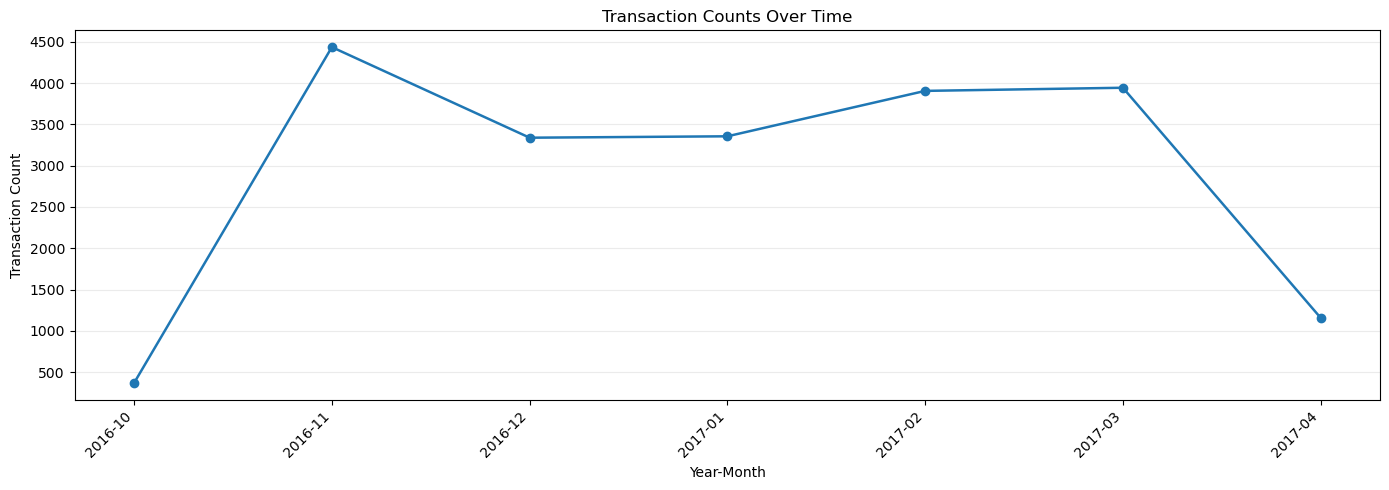

In [30]:
# 7
df['year_month'] = df['date_time'].dt.to_period('M').astype(str)

# hitung jumlah transaksi per bulan
monthly_counts = df.groupby('year_month').size()

# plot
plt.figure(figsize=(14,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=1.8)
plt.title("Transaction Counts Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

- Peak sales in November, December, and March.
- A sharp decline in April.
- No data for May to September.
- Possible seasonal effects, with higher sales around holidays.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??`

In [31]:
#9
# Check unique values in weekday_weekend column
print("Unique values in weekday_weekend:")
print(df['weekday_weekend'].unique())

# Create a cross-tabulation to see which days are weekdays and which are weekends
weekday_breakdown = pd.crosstab(df['DayName'], df['weekday_weekend'])
print("\nWeekday/Weekend breakdown by day of week:")
print(weekday_breakdown)

Unique values in weekday_weekend:
['weekend' 'weekday']

Weekday/Weekend breakdown by day of week:
weekday_weekend  weekday  weekend
DayName                          
Friday              3124        0
Monday              2324        0
Saturday               0     4605
Sunday                 0     3095
Thursday            2646        0
Tuesday             2392        0
Wednesday           2321        0



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [32]:
#10

df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot = df.pivot_table(
    index="month",
    columns="day_name",
    values="Transaction",   
    aggfunc="count",
    fill_value=0
)

pivot = pivot.reindex(columns=days_order)
print(pivot)

day_name  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month                                                                   
1            329      474        322       399     489       807     536
2            474      429        419       456     599       879     650
3            379      433        459       557     674       883     559
4            118      115        143       118      99       381     183
10           199        0          0         0       0         0     170
11           469      599        576       591     639       879     683
12           356      342        402       525     624       776     314


11. Wow, it turns out the insight that can be gained from the table above is _____

Insights:
- Weekends (especially Saturday) drive most transactions; Friday strong in peaks.  
- Peak months: Nov, Mar, Feb, Jan, Dec; Apr drops sharply; May–Sep missing (data gap).  
- Data spans Oct–Dec 2016 and Jan–Apr 2017 → possible seasonal bias.

Action:
- Increase weekend staffing/stock in peak months.  
- Investigate May–Sep gap before concluding seasonality.  
- Run weekday promotions to smooth demand.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

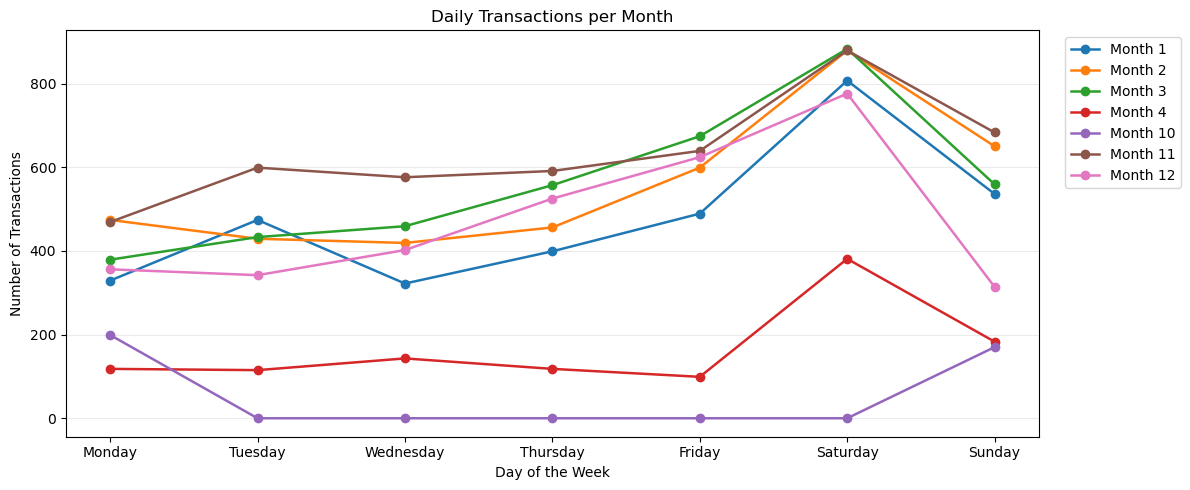

In [33]:
# 12
months_to_plot = [1,2,3,4,10,11,12]
plt.figure(figsize=(12,5))

for m in months_to_plot:
    if m in pivot.index:
        y = pivot.loc[m].values
    else:
        y = [0]*len(days_order)
    plt.plot(days_order, y, marker='o', linewidth=1.8, label=f"Month {m}")


plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.legend(title=None, bbox_to_anchor=(1.02, 1), loc='upper left')  
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()


plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

- Sales peak on weekends, especially Saturdays, in most months.
- Fridays also show high transactions.
- Weekday sales are steady but lower.
- November, December, and March have strong weekend spikes; April drops sharply.
- No data for May–September.
- Weekend demand drives overall sales, likely due to leisure time and seasonal events.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [34]:
# 14
unique_periods = df['period_day'].unique()
print("Unique values in 'period_day':", unique_periods)

Unique values in 'period_day': ['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [35]:
# 15
period_ranges = df.groupby('period_day')['Hour'].agg(['min', 'max'])
print("Hour ranges for each period_day:")
print(period_ranges)

Hour ranges for each period_day:
            min  max
period_day          
afternoon    12   16
evening      17   20
morning       1   11
night        21   23


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

- "Morning" covers hours 1–11, including very early hours (1–6 AM) when bakeries are usually closed.
- Transactions at these hours are odd and may indicate data errors or unusual business hours.
- Period boundaries are strict and non-overlapping.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

Hourly transaction counts by day of week:
Hour       1   7    8    9    10   11   12   13   14   15   16  17  18  19  \
DayName                                                                      
Monday      0   5   72  212  327  299  354  279  322  255  155  36   8   0   
Tuesday     0   5   71  243  275  329  340  341  283  263  156  75   8   1   
Wednesday   0   5   89  225  283  306  313  264  298  268  195  57  15   1   
Thursday    0   7   96  269  316  391  347  343  349  277  166  66   7  11   
Friday      0   1  144  385  392  427  398  412  365  286  244  59   6   2   
Saturday    0   1  171  452  615  749  595  530  567  432  340  66  26  33   
Sunday      1   0    2  180  458  601  507  448  456  334   87   9  12   0   

Hour       20  21  22  23  
DayName                    
Monday      0   0   0   0  
Tuesday     0   0   0   2  
Wednesday   0   0   2   0  
Thursday    1   0   0   0  
Friday      3   0   0   0  
Saturday   18   3   6   1  
Sunday      0   0   0   0  


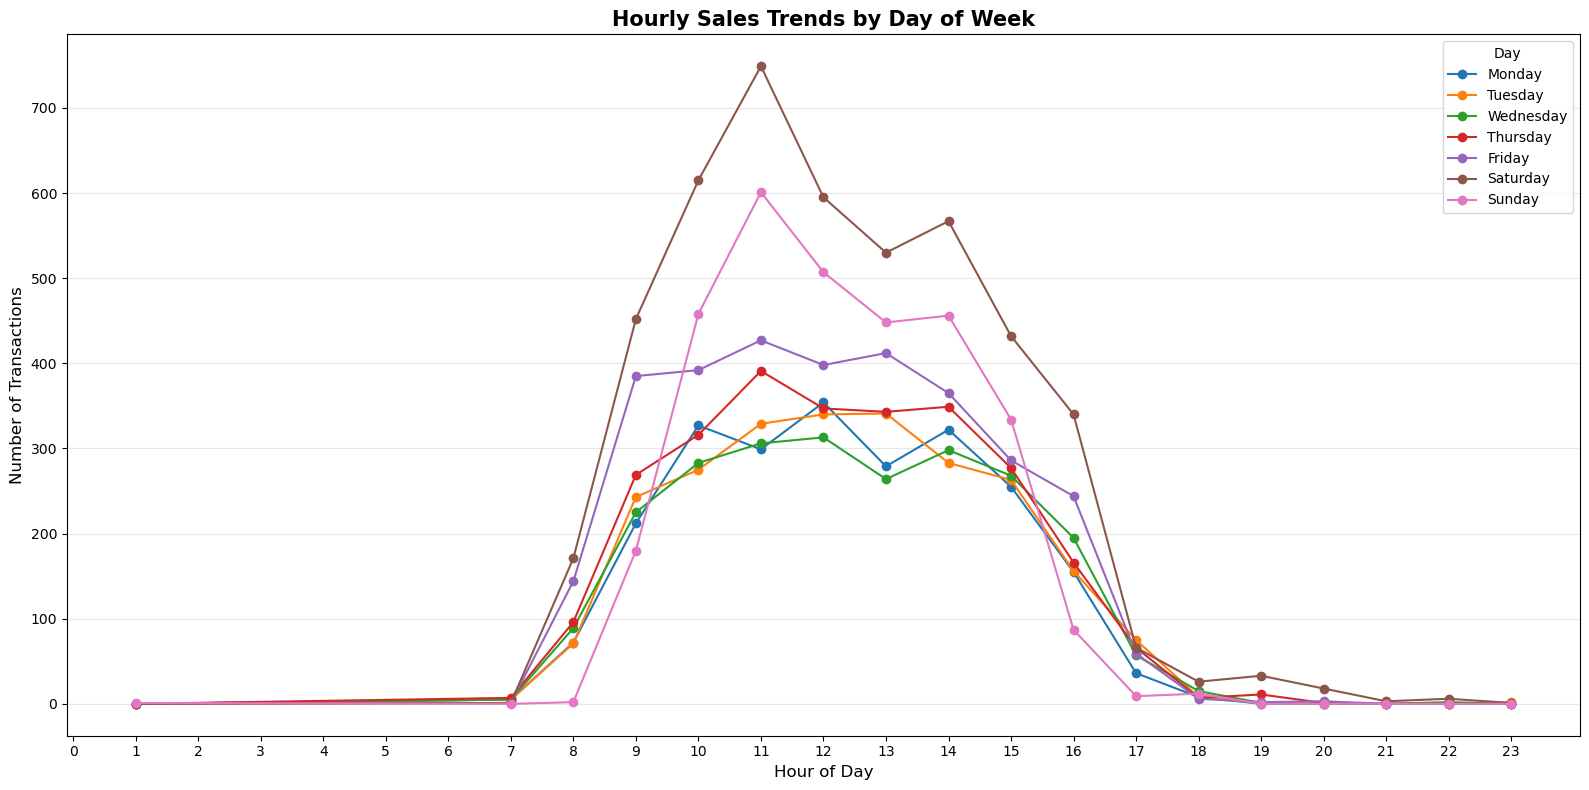

In [36]:
# 17
# Aggregate total transactions by DayName and Hour
hourly_dayname = pd.crosstab(df['DayName'], df['Hour']).reindex(index=week_order, fill_value=0)

print("Hourly transaction counts by day of week:")
print(hourly_dayname)

# Visualize hourly sales trends for each day of the week
plt.figure(figsize=(16, 8))
for day in week_order:
    plt.plot(hourly_dayname.columns, hourly_dayname.loc[day], marker='o', label=day)

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Hourly Sales Trends by Day of Week', fontsize=15, fontweight='bold')
plt.legend(title='Day', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that ___________

- Sales peak on weekends, especially Saturdays and Sundays.
- Fridays also see high transactions.
- Weekday sales are steady but lower.
- Pattern holds across available months.
- Weekend demand drives overall sales.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

Top 10 most popular items:
Item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64


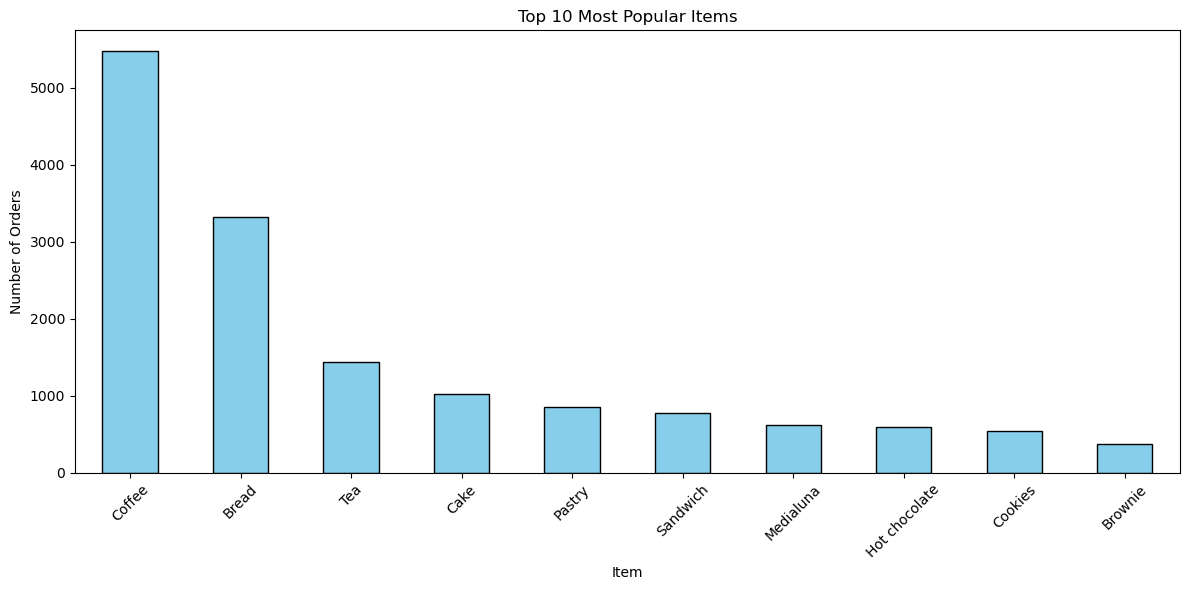

In [37]:
# 19
item_counts = df['Item'].value_counts()
print("Top 10 most popular items:")
print(item_counts.head(10))

plt.figure(figsize=(12, 6))
item_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\812138692.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r')


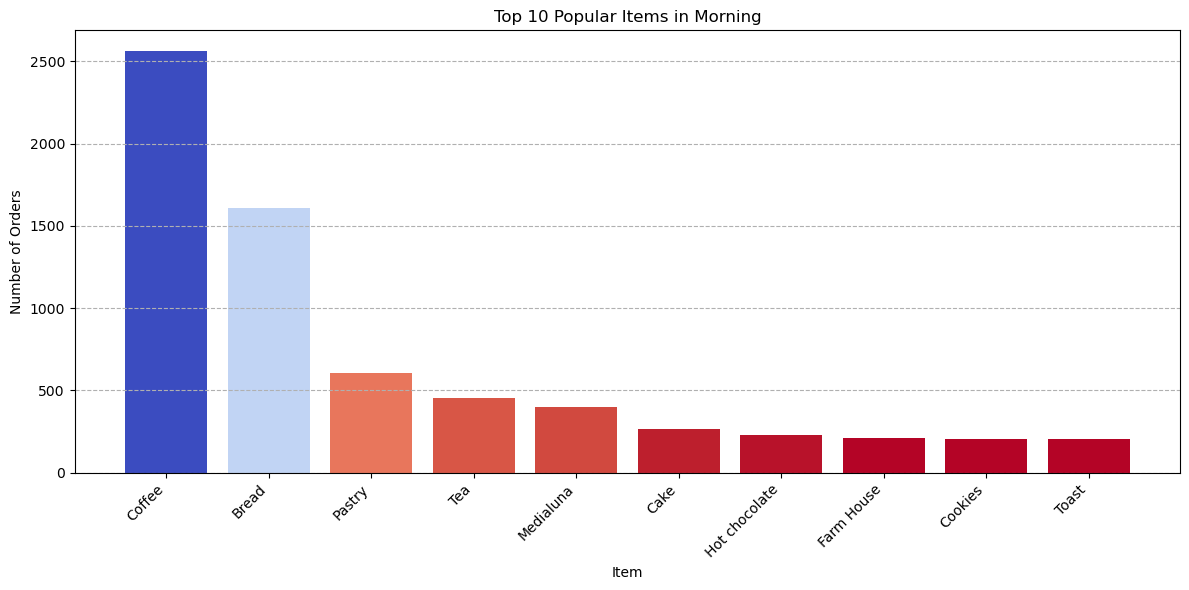

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\812138692.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r')


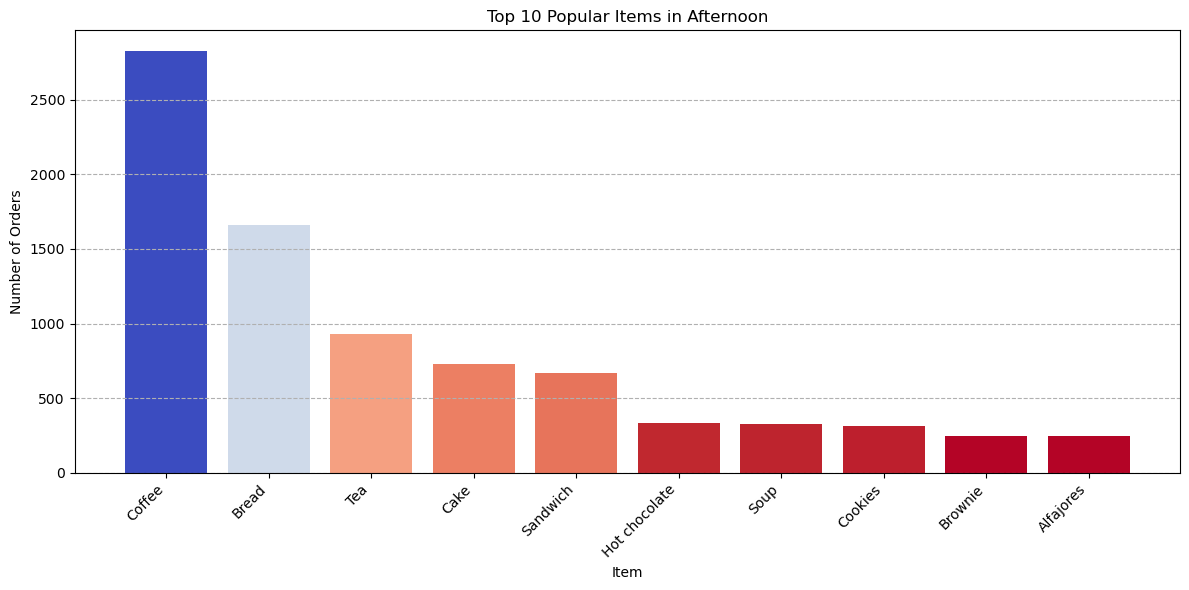

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\812138692.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r')


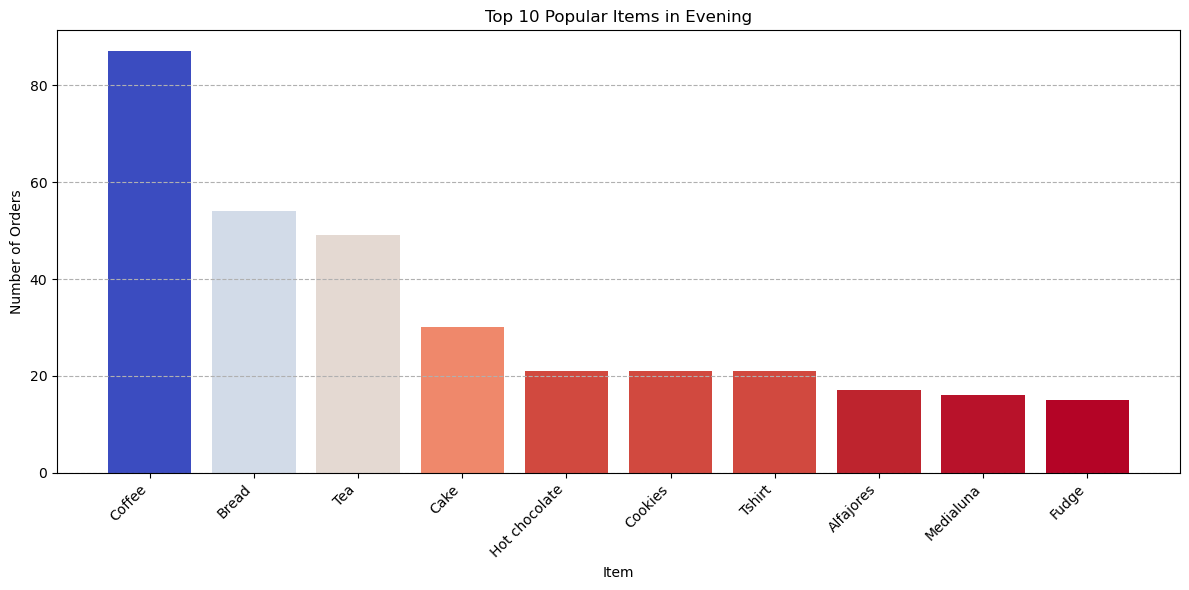

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\812138692.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r')


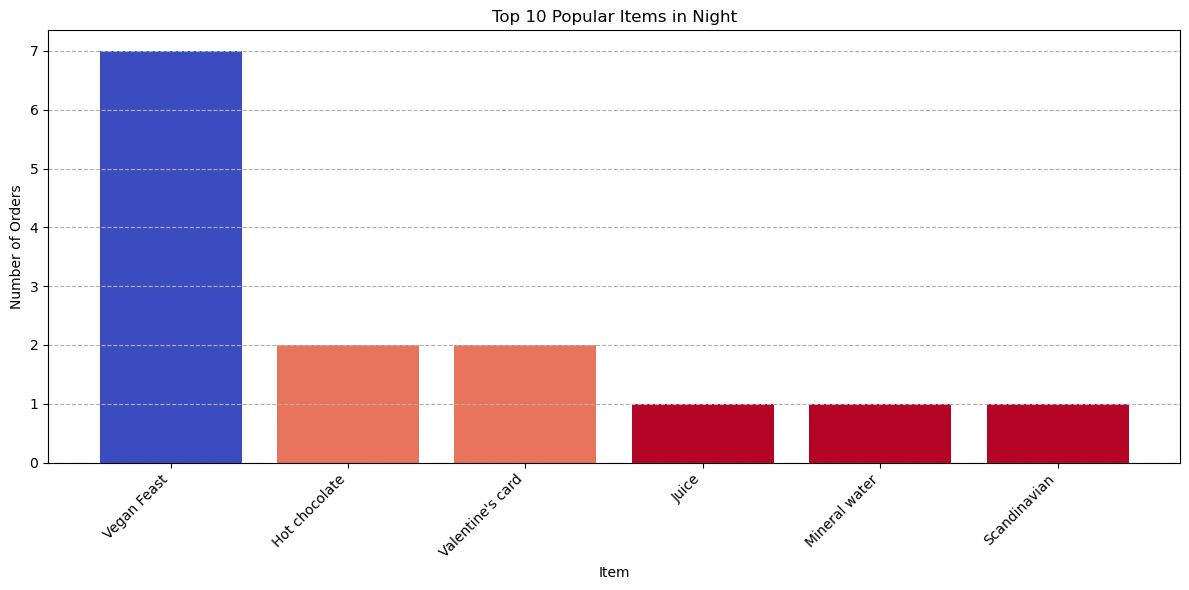

In [38]:
#20
# Morning
period_df = df[df['period_day'] == 'morning']
top_items = period_df['Item'].value_counts().drop(labels=['NONE'], errors='ignore').head(10)

plt.figure(figsize=(12, 6))
if not top_items.empty:
    norm = plt.Normalize(vmin=top_items.min(), vmax=top_items.max())
    cmap = plt.cm.get_cmap('coolwarm_r')
    colors = [cmap(norm(value)) for value in top_items.values]
else:
    colors = ['lightcoral']
plt.bar(top_items.index, top_items.values, color=colors)
plt.title('Top 10 Popular Items in Morning')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# Afternoon
period_df = df[df['period_day'] == 'afternoon']
top_items = period_df['Item'].value_counts().drop(labels=['NONE'], errors='ignore').head(10)

plt.figure(figsize=(12, 6))
if not top_items.empty:
    norm = plt.Normalize(vmin=top_items.min(), vmax=top_items.max())
    cmap = plt.cm.get_cmap('coolwarm_r')
    colors = [cmap(norm(value)) for value in top_items.values]
else:
    colors = ['lightcoral']
plt.bar(top_items.index, top_items.values, color=colors)
plt.title('Top 10 Popular Items in Afternoon')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# Evening
period_df = df[df['period_day'] == 'evening']
top_items = period_df['Item'].value_counts().drop(labels=['NONE'], errors='ignore').head(10)

plt.figure(figsize=(12, 6))
if not top_items.empty:
    norm = plt.Normalize(vmin=top_items.min(), vmax=top_items.max())
    cmap = plt.cm.get_cmap('coolwarm_r')
    colors = [cmap(norm(value)) for value in top_items.values]
else:
    colors = ['lightcoral']
plt.bar(top_items.index, top_items.values, color=colors)
plt.title('Top 10 Popular Items in Evening')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Night
period_df = df[df['period_day'] == 'night']
top_items = period_df['Item'].value_counts().drop(labels=['NONE'], errors='ignore').head(10)

plt.figure(figsize=(12, 6))
if not top_items.empty:
    norm = plt.Normalize(vmin=top_items.min(), vmax=top_items.max())
    cmap = plt.cm.get_cmap('coolwarm_r')
    colors = [cmap(norm(value)) for value in top_items.values]
else:
    colors = ['lightcoral']
plt.bar(top_items.index, top_items.values, color=colors)
plt.title('Top 10 Popular Items in Night')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


- Afternoon and morning periods dominate sales, with afternoon having the highest transaction count.
- Evening sales are much lower, and night sales are almost negligible.
- Most customer activity occurs during daytime hours, suggesting the bakery’s business is concentrated in morning and afternoon.
- The sharp drop in evening and night sales may reflect typical bakery operating hours or customer habits.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

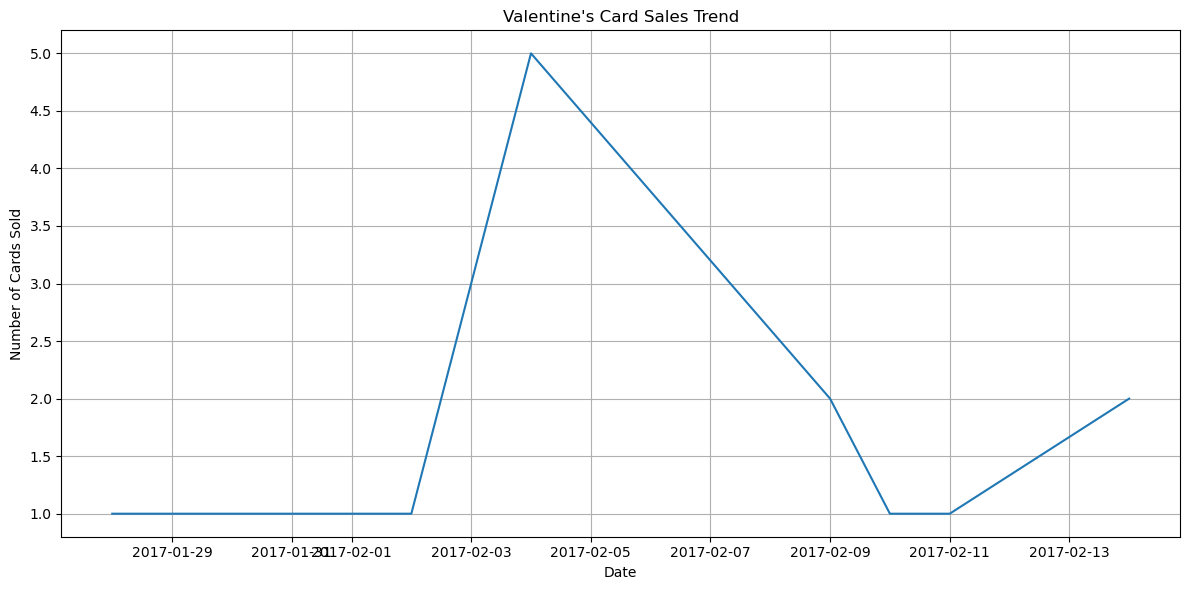

In [39]:
valentine_sales = df[df['Item'] == "Valentine's card"]
valentine_sales_daily = valentine_sales.groupby(valentine_sales['date_time'].dt.date).size()

plt.figure(figsize=(12, 6))
valentine_sales_daily.plot(kind='line', linestyle='-')
plt.title("Valentine's Card Sales Trend")
plt.xlabel('Date')
plt.ylabel('Number of Cards Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


- Valentine's cards were mainly bought in early February, peaking around Feb 14.
- Saturdays and Thursdays were popular days.
- Purchases happened across all periods, including late at night.
- Some customers buy ahead, others at the last minute.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [40]:
# 24
basket = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\2778340838.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#25
# Convert quantities to 1 and 0
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_15468\548269437.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [42]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
display(frequent_itemsets)

c:\Conda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [43]:
# 27
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules.sort_values(by='confidence', ascending=False)

display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

### 1. The "Coffee Anchor" Phenomenon
The most immediate finding is that **Coffee** is the overwhelming economic anchor of the establishment. With a consequent support of **0.478**, nearly half of all transactions in this dataset involve coffee.
* **Insight:** Coffee acts as the "magnet" for almost all other food items. The majority of high-confidence rules involve food items pointing *towards* coffee (e.g., Medialuna, Pastry, Sandwich, Cake).
* **Risk Assessment:** The business is heavily reliant on this single commodity. A disruption in coffee supply or quality would likely cause a cascading drop in sales across all food categories.

### 2. The Power Pair: Toast & Coffee
The strongest predictive relationship in the entire dataset is **Toast $\rightarrow$ Coffee**.
* **The Metric:** This rule holds a **Confidence of 70.4%** and a **Lift of 1.47**.
* **Interpretation:** When a customer orders Toast, there is a 7-in-10 chance they will also order Coffee. The high lift indicates this is not random chance; these items are intrinsically linked in the customer's mind, likely representing a standard "Breakfast Combo."

### 3. The "Afternoon Tea" Niche (Highest Lift)
While Coffee drives volume, the relationship between **Cake and Tea** represents the strongest *affinity* in the dataset.
* **The Metric:** The rule **Cake $\rightarrow$ Tea** (and vice versa) exhibits a **Lift of 1.60**, the highest in the analyzed set.
* **Interpretation:** Although the raw volume (Support ~2.3%) is lower than the coffee transactions, the bond between these two items is stronger. This likely represents a distinct customer segment—perhaps an afternoon crowd—that is separate from the morning coffee rush.

### 4. Directional Asymmetry
The data highlights that purchasing relationships are rarely bidirectional.
* **Observation:** While buying Toast strongly predicts buying Coffee (70% confidence), buying Coffee does **not** strongly predict buying Toast (only 4.9% confidence).
* **Impact:** Upselling efforts should be directional. A barista should suggest coffee to a food buyer (high success rate), but suggesting specific food items to a coffee buyer requires more targeted profiling, as the coffee buyer could be anyone.

### Strategic Recommendations
Based on these metrics, the following actions are recommended:
1.  **Formalize the "Morning Bundle":** Create a fixed-price "Coffee & Toast" menu item to streamline the ordering process for the 70% of toast customers who effectively order this anyway.
2.  **Targeted Cross-Selling:** Train staff to specifically suggest **Cake** when a customer orders **Tea**. The high lift (1.60) suggests this specific suggestion is the most likely to result in an add-on sale.
3.  **Layout Optimization:** Place "impulse" sweets (Cookies, Hot Chocolate) near the register. Their association with coffee is positive but weaker (Lift ~1.06–1.08), suggesting they benefit from visibility rather than planned pairing.